In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# URL direta da base
url = "https://www.ispdados.rj.gov.br/Arquivos/BaseDPEvolucaoMensalCisp.csv"

# as bases do ISP costumam usar ; e latin1
df = pd.read_csv(url, sep=";", encoding="latin1")

# verificar colunas
print(df.columns)


Index(['cisp', 'mes', 'ano', 'mes_ano', 'aisp', 'risp', 'munic', 'mcirc',
       'regiao', 'hom_doloso', 'lesao_corp_morte', 'latrocinio', 'cvli',
       'hom_por_interv_policial', 'letalidade_violenta', 'tentat_hom',
       'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa',
       'roubo_transeunte', 'roubo_celular', 'roubo_em_coletivo', 'roubo_rua',
       'roubo_veiculo', 'roubo_carga', 'roubo_comercio', 'roubo_residencia',
       'roubo_banco', 'roubo_cx_eletronico', 'roubo_conducao_saque',
       'roubo_apos_saque', 'roubo_bicicleta', 'outros_roubos', 'total_roubos',
       'furto_veiculos', 'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas'

In [10]:
# URL direta da base do ISP
url = "https://www.ispdados.rj.gov.br/Arquivos/BaseDPEvolucaoMensalCisp.csv"

# carregar CSV (bases ISP usam ; e latin1)
df = pd.read_csv(url, sep=";", encoding="latin1")


In [11]:
# Filtrar somente a cidade do Rio de Janeiro (capital)
df_cap = df[df["munic"].str.upper() == "RIO DE JANEIRO"]

In [12]:
# Selecionar colunas de interesse
col_roubo = "roubo_veiculo"
col_furto = "furto_veiculos"
col_delegacia = "cisp"

In [13]:
# Agregar total de eventos por delegacia
agr = df_cap.groupby(col_delegacia)[[col_roubo, col_furto]].sum()

In [14]:
# --- Identificação de outliers ---
# Critério: acima de média + 2 desvios padrão

limite_roubo = agr[col_roubo].mean() + 2 * agr[col_roubo].std()
limite_furto = agr[col_furto].mean() + 2 * agr[col_furto].std()

outliers_roubo = agr[agr[col_roubo] > limite_roubo]
outliers_furto = agr[agr[col_furto] > limite_furto]

print("Delegacias que destoam em ROUBO de veículo:")
print(outliers_roubo)

print("\nDelegacias que destoam em FURTO de veículo:")
print(outliers_furto)

print("\nLimite roubo:", limite_roubo)
print("Limite furto:", limite_furto)

Delegacias que destoam em ROUBO de veículo:
      roubo_veiculo  furto_veiculos
cisp                               
27            27214           11810
34            27172            9725
39            28669            3831

Delegacias que destoam em FURTO de veículo:
      roubo_veiculo  furto_veiculos
cisp                               
16             5830           12321
27            27214           11810
35            19032           14404

Limite roubo: 25165.629822903233
Limite furto: 11043.920369716769


In [15]:
# filtrar últimos 10 anos (ex: 2015-2024)
df_ult_decada = df[df["ano"] >= df["ano"].max() - 9]


In [16]:
# conferir
df_ult_decada["ano"].unique()

array([2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025])

In [17]:

# Lista de municípios da Região Metropolitana
municipios_rm = [
    "Belford Roxo", "Duque de Caxias", "Guapimirim", "Itaboraí", "Itaguaí",
    "Japerí", "Magé", "Maricá", "Mesquita", "Nilópolis", "Niterói",
    "Nova Iguaçu", "Paracambi", "Petrópolis", "Queimados", "Seropédica",
    "São Gonçalo", "São João de Meriti", "Tanguá", "Cachoeiras de Macacu",
    "Rio Bonito", "Rio de Janeiro"
]


In [18]:
# Filtrar apenas esses municípios
df_rm = df_ult_decada[df_ult_decada["munic"].isin(municipios_rm)]

In [19]:
col_furto = "furto_veiculos"


In [20]:
agr_munic = df_rm.groupby("munic")[col_furto].sum()


In [21]:
media = agr_munic.mean()
desvio = agr_munic.std()
limite = media + 2*desvio

outliers = agr_munic[agr_munic > limite]
print("Municípios da Região Metropolitana que destoam em furto de veículos na última década:")
print(outliers)


Municípios da Região Metropolitana que destoam em furto de veículos na última década:
munic
Rio de Janeiro    71510
Name: furto_veiculos, dtype: int64


In [22]:
# Quais Upps destoam das demais no que diz respeito a ocorrências relacionadas à apreensão de drogas

In [23]:
df


,cisp,mes,ano,mes_ano,aisp,risp,munic,mcirc,regiao,hom_doloso,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,1,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,0,...,NaN,NaN,21,2,0,0,0,0,578,3
1,4,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,15,6,0,1,0,0,441,3
2,5,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,47,2,1,0,0,0,637,3
3,6,1,2003,2003m01,1,1,Rio de Janeiro,3304557,Capital,6,...,NaN,NaN,26,2,1,0,0,0,473,3
4,7,1,2003,2003m01,1,1,Rio de Janeiro,3304557,Capital,4,...,NaN,NaN,10,1,3,0,0,0,147,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36898,159,10,2025,2025m10,35,4,Cachoeiras de Macacu,3300803,Interior,1,...,4.0,0.0,37,2,0,0,0,0,163,2
36899,165,10,2025,2025m10,33,5,Mangaratiba,3302601,Interior,1,...,4.0,0.0,21,0,0,0,0,0,196,2
36900,166,10,2025,2025m10,33,5,Angra dos Reis,3300100,Interior,3,...,12.0,0.0,82,8,0,1,0,0,682,2
36901,167,10,2025,2025m10,43,5,Paraty,3303807,Interior,1,...,2.0,1.0,11,1,0,0,0,0,195,2


In [25]:
# verificar colunas
print(df.columns)

Index(['cisp', 'mes', 'ano', 'mes_ano', 'aisp', 'risp', 'munic', 'mcirc',
       'regiao', 'hom_doloso', 'lesao_corp_morte', 'latrocinio', 'cvli',
       'hom_por_interv_policial', 'letalidade_violenta', 'tentat_hom',
       'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa',
       'roubo_transeunte', 'roubo_celular', 'roubo_em_coletivo', 'roubo_rua',
       'roubo_veiculo', 'roubo_carga', 'roubo_comercio', 'roubo_residencia',
       'roubo_banco', 'roubo_cx_eletronico', 'roubo_conducao_saque',
       'roubo_apos_saque', 'roubo_bicicleta', 'outros_roubos', 'total_roubos',
       'furto_veiculos', 'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas'

In [27]:
# URL da base
url = "https://www.ispdados.rj.gov.br/Arquivos/BaseDPEvolucaoMensalCisp.csv"

In [28]:
# Carregar CSV
df = pd.read_csv(url, sep=";", encoding="latin1")


In [29]:
# Colunas de interesse
col_up = "cisp"
col_drogas = "apreensao_drogas"

In [35]:
# Agrupar total de apreensões por UPP corretamente
agr_up = df_cap.groupby("cisp")["apreensao_drogas"].sum()

In [37]:
# Identificação de outliers (> média + 2 desvios padrão)
media = agr_up.mean()
desvio = agr_up.std()
limite = media + 2*desvio

outliers = agr_up[agr_up > limite]

print("UPPs que destoam das demais em apreensão de drogas:")
print(outliers)

UPPs que destoam das demais em apreensão de drogas:
cisp
21     9077
34    11053
Name: apreensao_drogas, dtype: int64


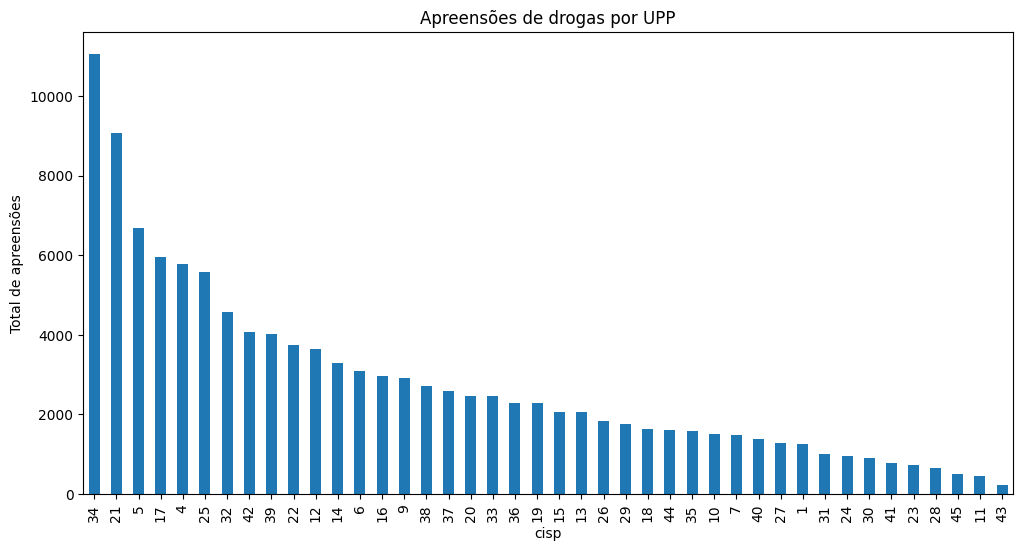

In [38]:
# Gráfico opcional
agr_up.sort_values(ascending=False).plot(
    kind="bar", figsize=(12,6), title="Apreensões de drogas por UPP"
)
plt.ylabel("Total de apreensões")
plt.show()


In [40]:
municipios_rm = [
    "Belford Roxo", "Duque de Caxias", "Guapimirim", "Itaboraí", "Itaguaí",
    "Japerí", "Magé", "Maricá", "Mesquita", "Nilópolis", "Niterói",
    "Nova Iguaçu", "Paracambi", "Petrópolis", "Queimados", "Seropédica",
    "São Gonçalo", "São João de Meriti", "Tanguá", "Cachoeiras de Macacu",
    "Rio Bonito", "Rio de Janeiro"
]


In [41]:


# Carregar CSV
url = "https://www.ispdados.rj.gov.br/Arquivos/BaseDPEvolucaoMensalCisp.csv"
df = pd.read_csv(url, sep=";", encoding="latin1")

# Filtrar apenas RM
df_rm = df[df["munic"].isin(municipios_rm)]

# Definir períodos
periodo_atual = df_rm[df_rm["ano"].isin([2021, 2022])]
periodo_anterior = df_rm[df_rm["ano"].isin([2019, 2020])]


In [46]:
col_delegacia = "cisp"
col_drogas = "apreensao_drogas"

# Total por CISP
agr_atual = periodo_atual.groupby(col_delegacia)[col_drogas].sum()
agr_anterior = periodo_anterior.groupby(col_delegacia)[col_drogas].sum()


In [47]:
def detectar_outliers(serie):
    media = serie.mean()
    desvio = serie.std()
    limite = media + 2*desvio
    return serie[serie > limite]

outliers_atual = detectar_outliers(agr_atual)
outliers_anterior = detectar_outliers(agr_anterior)

print("Outliers nos 2 primeiros anos da gestão atual:")
print(outliers_atual)

print("\nOutliers nos 2 primeiros anos da gestão anterior:")
print(outliers_anterior)


Outliers nos 2 primeiros anos da gestão atual:
cisp
42    1751
Name: apreensao_drogas, dtype: int64

Outliers nos 2 primeiros anos da gestão anterior:
cisp
34    1217
42     795
Name: apreensao_drogas, dtype: int64


In [48]:
# Delegacias que deixaram de ser outlier
deixaram_de_ser = outliers_anterior.index.difference(outliers_atual.index)

# Delegacias que passaram a ser outlier
passaram_a_ser = outliers_atual.index.difference(outliers_anterior.index)

print("\nDelegacias que deixaram de ser outlier:", list(deixaram_de_ser))
print("Delegacias que passaram a ser outlier:", list(passaram_a_ser))



Delegacias que deixaram de ser outlier: [34]
Delegacias que passaram a ser outlier: []
